In [10]:
# Find value of N and NB suitable for available nodes and memory
# Source: https://www.sciencedirect.com/science/article/pii/S0167739X1833142X

from math import sqrt

# Number of nodes in the cluster, in number CPUs (not the number of cores)
node_count = 1
# Amount of RAM, in GB
node_ram = 8
# Maximum RAM usage, in %
ram_usage_max = 90
# A suggested value of NB that will be used to refine the N value to provide a range of NB values, suggest 128
nb_suggested = 128

def Ncalculator(ram):
    return int(sqrt(node_count * node_ram * 1024**3 / 8) * ram/100)

def Nrange(ram, nb):
    N_range_values=[]
    for i in range(10, ram+10, 10):
        N_pre = Ncalculator(i)
        N_post = Nsuggestor(N_pre, nb)
        N_range_values.append(N_post)
    return N_range_values

def Nsuggestor(N_initial, nb_suggested):
    return N_initial - N_initial % nb_suggested
        

def divisorGenerator(n):
    large_divisors = []
    for i in range(1, int(sqrt(n) + 1)):
        if n % i == 0:
            yield i
            if i*i != n:
                large_divisors.append(n / i)
    for divisor in reversed(large_divisors):
        yield divisor

N_initial = Ncalculator(ram_usage_max)
N_suggested = Nsuggestor(N_initial, nb_suggested)
N_range = Nrange(ram_usage_max, nb_suggested)

print(f"Initial value for N: {N_initial}\n")
print(f"Suggested value for N: {N_suggested}\n")
print(f"Potential NBs for suggested N: \n{list(divisorGenerator(N_suggested))}\n")
print(f"Range of suggested N values based on ram usage from 10% to maximum in 10% steps: \n{N_range}")

Initial value for N: 29491

Suggested value for N: 29440

Potential NBs for suggested N: 
[1, 2, 4, 5, 8, 10, 16, 20, 23, 32, 40, 46, 64, 80, 92, 115, 128, 160, 184.0, 230.0, 256.0, 320.0, 368.0, 460.0, 640.0, 736.0, 920.0, 1280.0, 1472.0, 1840.0, 2944.0, 3680.0, 5888.0, 7360.0, 14720.0, 29440.0]

Range of suggested N values based on ram usage from 10% to maximum in 10% steps: 
[3200, 6528, 9728, 13056, 16384, 19584, 22912, 26112, 29440]


In [8]:
from mpl_toolkits import mplot3d

ImportError: libopenjp2.so.7: cannot open shared object file: No such file or directory

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import choice

ImportError: libopenjp2.so.7: cannot open shared object file: No such file or directory

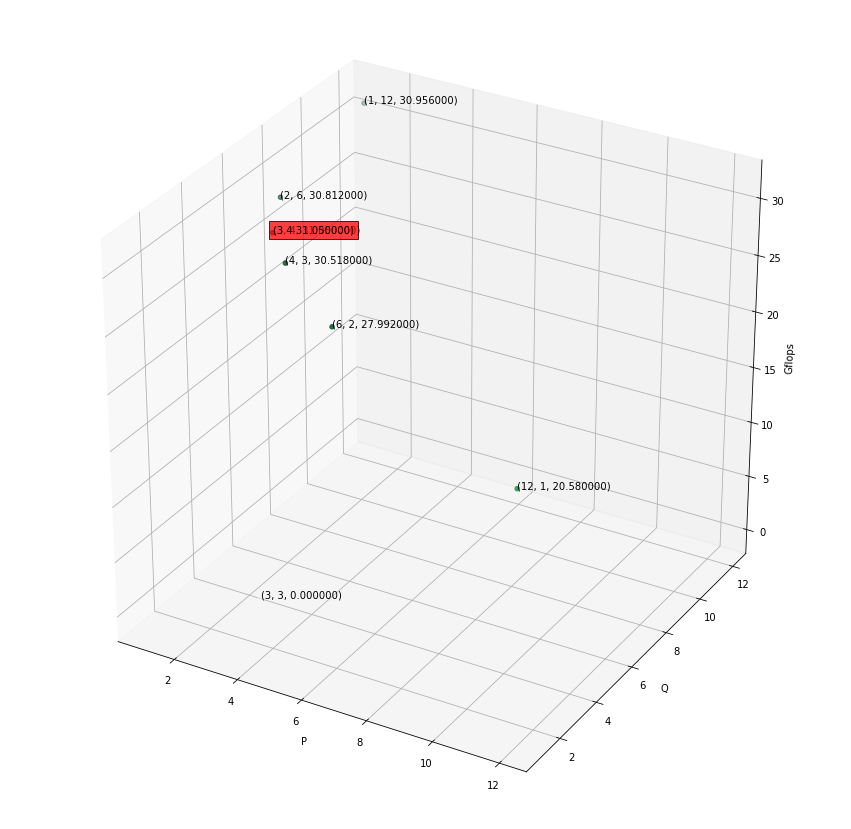

In [4]:
# 06/09/2020 3 node cluster

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.set_xlabel('P')
ax.set_ylabel('Q')
ax.set_zlabel('Gflops')

# Data for three-dimensional scattered points
zdata = (3.1050E+01,3.0518E+01,3.0812E+01,2.7992E+01,3.0956E+01,2.0580E+01,0)
xdata = (3,4,2,6,1,12,3)
ydata = (4,3,6,2,12,1,3)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

max_gflops = zdata.index(max(zdata))

for x,y,z in zip(xdata,ydata,zdata):
    label = '(%d, %d, %f)' % (x, y, z)
    ax.text(x, y, z, label)
    
max_label = '(%d %d %f)' % (xdata[max_gflops], ydata[max_gflops],zdata[max_gflops])
ax.text(xdata[max_gflops], ydata[max_gflops],zdata[max_gflops], max_label, bbox=dict(facecolor='red', alpha=0.75))

plt.show()

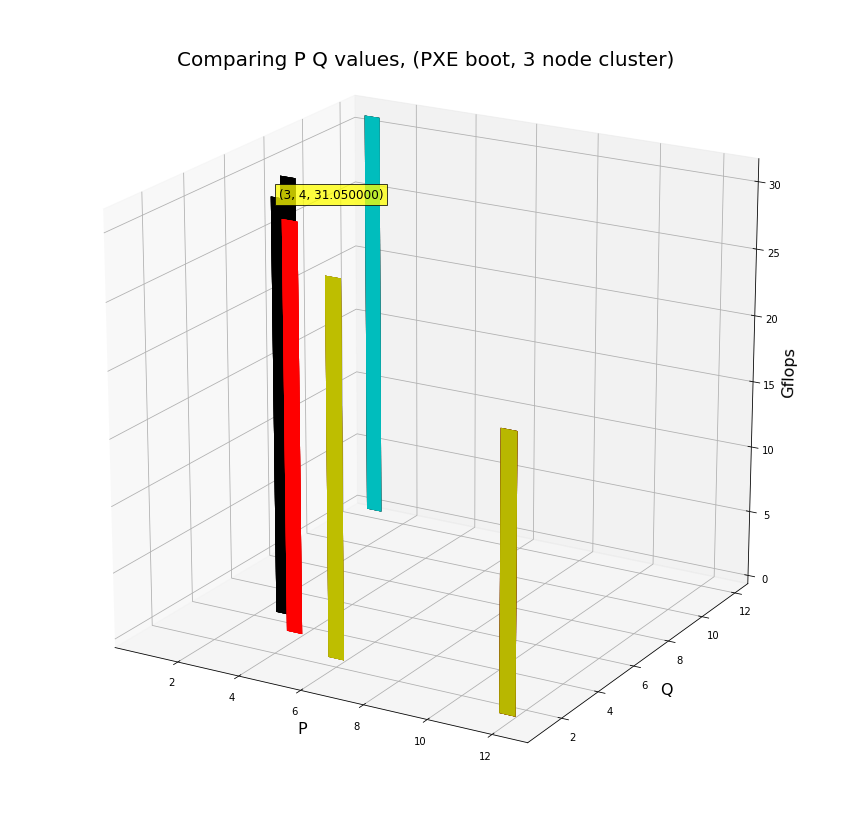

In [105]:
# 06/09/2020 3 node cluster

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('P', fontsize=16)
ax.set_ylabel('Q', fontsize=16)
ax.set_zlabel('Gflops', fontsize=16)
ax.set_title('Comparing P Q values, (PXE boot, 3 node cluster)', fontsize=20)

# Data for three-dimensional scattered points
zdata = (3.1050E+01,3.0518E+01,3.0812E+01,2.7992E+01,3.0956E+01,2.0580E+01,0)
xdata = (3,4,2,6,1,12,3)
ydata = (4,3,6,2,12,1,3)

# colour setup
colours = ('r', 'g', 'b', 'k', 'c', 'm', 'y')
z_colour=[]

# plot data
for z in zdata:
    z_colour.append(choice(colours))
    ax.bar(xdata, zdata, ydata, zdir='y', color=z_colour, alpha=0.8, width=0.5)

# max value indicator
max_gflops = zdata.index(max(zdata))
max_label = '(%d, %d, %f)' % (xdata[max_gflops], ydata[max_gflops],zdata[max_gflops])
ax.text(xdata[max_gflops], ydata[max_gflops],zdata[max_gflops], max_label, bbox=dict(facecolor='yellow', alpha=0.75), zorder=1000, fontsize=12)

# view orientation
ax.view_init(elev=20., azim=-60)    

plt.show()


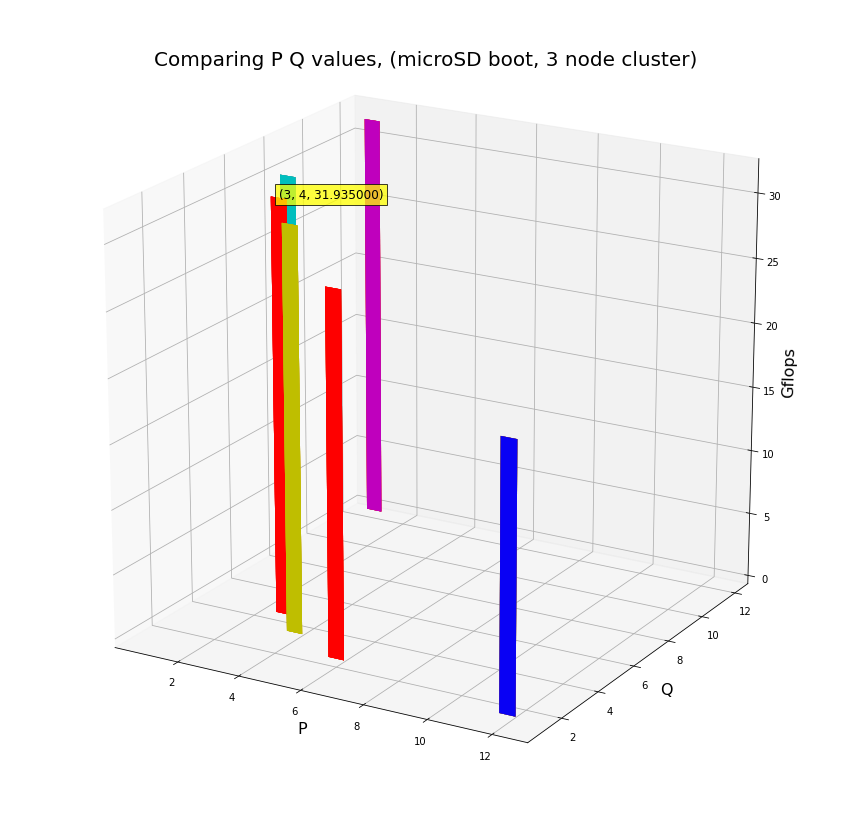

In [106]:
# 06/09/2020 3 node cluster

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('P', fontsize=16)
ax.set_ylabel('Q', fontsize=16)
ax.set_zlabel('Gflops', fontsize=16)
ax.set_title('Comparing P Q values, (microSD boot, 3 node cluster)', fontsize=20)

# Data for three-dimensional scattered points
zdata = (3.1935e+01,3.1105e+01,3.1768e+01,2.7990e+01,3.1561e+01,2.0581e+01,0)
xdata = (3,4,2,6,1,12,3)
ydata = (4,3,6,2,12,1,3)

# colour setup
colours = ('r', 'g', 'b', 'k', 'c', 'm', 'y')
z_colour=[]

# plot data
for z in zdata:
    z_colour.append(choice(colours))
    ax.bar(xdata, zdata, ydata, zdir='y', color=z_colour, alpha=0.8, width=0.5)

# max value indicator
max_gflops = zdata.index(max(zdata))
max_label = '(%d, %d, %f)' % (xdata[max_gflops], ydata[max_gflops],zdata[max_gflops])
ax.text(xdata[max_gflops], ydata[max_gflops],zdata[max_gflops], max_label, bbox=dict(facecolor='yellow', alpha=0.75), zorder=1000, fontsize=12)

# view orientation
ax.view_init(elev=20., azim=-60)    

plt.show()


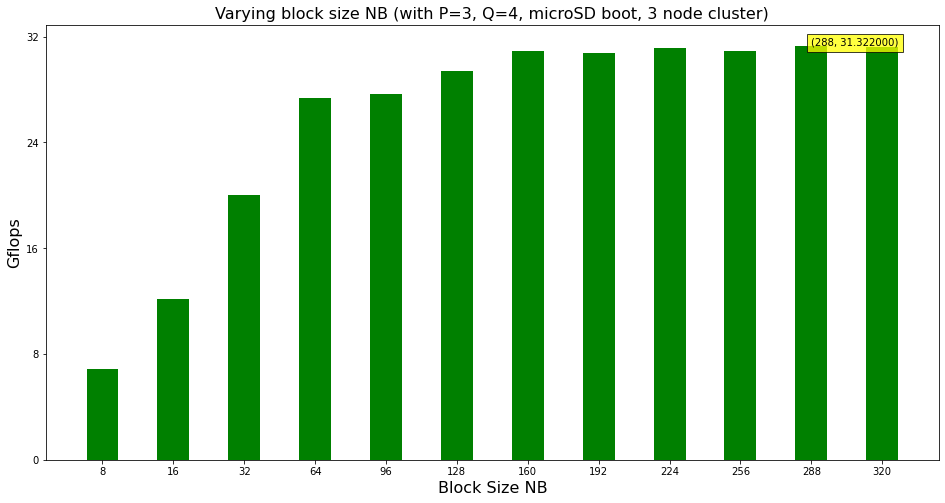

In [107]:
# 06/09/2020 3 node cluster

N = 12
Gflops = (6.8883e+00, 1.2195e+01, 2.0020e+01, 2.7339e+01,  2.7632e+01, 2.9392e+01, 3.0881e+01, 3.0780e+01, 3.1164e+01, 3.0926e+01, 3.1322e+01, 3.1247e+01)
index = np.arange(N)
width = 0.45

ydata = (8,16,32,64,96,128,160,192,224,256,288,320)



plt.subplots(figsize=(16,8))
plt.bar(index, Gflops, width, color = 'g')

# max value indicator
max_gflops = Gflops.index(max(Gflops))
max_label = '(%d, %f)' % (ydata[max_gflops], Gflops[max_gflops])
plt.text(10, Gflops[max_gflops], max_label, bbox=dict(facecolor='yellow', alpha=0.75))

plt.xlabel('Block Size NB',fontsize=16)
plt.ylabel('Gflops', fontsize=16)
plt.title('Varying block size NB (with P=3, Q=4, microSD boot, 3 node cluster)', fontsize=16)
plt.xticks(index, ydata)
plt.yticks(np.arange(0,40,8))

plt.show()

In [109]:
print("4 node cluster data")

4 node cluster data


In [1]:
# 01/10/2020 4 node cluster - comparing problem size and is 8GB RAM worthwhile

N = 9
Gflops_1500 = (1.6101e+01, 2.7273e+01, 3.3088e+01, 3.7662e+01, 4.0278e+01, 4.2363e+01, 4.3346e+01, 4.4092e+01, 4.6224e+01)
Gflops_2000 = (1.8715e+01, 3.0348e+01, 3.7773e+01, 4.1826e+01, 4.4612e+01,  4.7689e+01, 5.2279e+01, 5.2104e+01, 5.4754e+01)
index = np.arange(N)
width = 0.45

ydata = (6528,13056,19584,26112,32768,39296,45824,52352,58880)

plt.subplots(figsize=(16,9))

overclocked = plt.bar(index, Gflops_2000, width, color = 'r', label='2000GHz')
standard = plt.bar(index, Gflops_1500, width, color = 'o', label='1500GHz')


# max value indicator
max_gflops = Gflops_2000.index(max(Gflops_2000))
max_label = '(%d, %f)' % (ydata[max_gflops], Gflops_2000[max_gflops])
plt.text(7, Gflops_2000[max_gflops], max_label, bbox=dict(facecolor='yellow', alpha=0.75))

plt.xlabel('Problem Size N',fontsize=16)
plt.ylabel('Performance (Gflops)', fontsize=16)
plt.title('Varying problem size N with CPU frequency standard and overclocked \n(with NB = 184, P=4, Q=4, microSD boot, 4 node cluster, ATLAS built from source)', fontsize=16)
plt.xticks(index, ydata)
plt.yticks(np.arange(0,60,10))
plt.legend(fontsize=16)

plt.show()

NameError: name 'np' is not defined